## Data Validation using Pydantic

In [8]:

from pydantic import BaseModel
from langgraph.graph import StateGraph, START, END

In [9]:
class State(BaseModel):
    name:str

In [10]:
## node
def example(state: State):
    return {'name':state.name + "! good morning"}

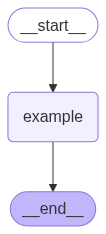

In [11]:
graph = StateGraph(State)

graph.add_node('example', example)
graph.add_edge(START, 'example')
graph.add_edge('example', END)
##view
graph_builder = graph.compile()
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [12]:
graph_builder.invoke({
    'name': 'rahul'
}) # type: ignore

{'name': 'rahul! good morning'}

through Pydantic BaseModel the data validation is done in runtime

In [13]:
graph_builder.invoke({
    'name': 123
}) 

ValidationError: 1 validation error for State
name
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type